In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append("../..")
sys.path.append("../../..")

# 1. Open dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
path = "/data/pcpe_02.csv"
df = pd.read_csv(path, delimiter=';', decimal=',')
df

/tmp/ipykernel_678/2782307085.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, delimiter=';', decimal=',')


,NUMERO_CASO,NUMERO_BANCO,NOME_BANCO,NUMERO_AGENCIA,NUMERO_CONTA,TIPO,NOME_TITULAR,CPF_CNPJ_TITULAR,DESCRICAO_LANCAMENTO,CNAB,...,CPF_CNPJ_OD,NOME_PESSOA_OD,TIPO_PESSOA_OD,NUMERO_BANCO_OD,NUMERO_AGENCIA_OD,NUMERO_CONTA_OD,I-d,DIA_LANCAMENTO,MES_LANCAMENTO,ANO_LANCAMENTO
0,EXTRATO-1.5-N5D3N8,H6D,BANCO BRADESCO S/A,9764,4077058,2,SIG. GIOELE CRISPI,ZM2260463766,RENDIMENTOS,205,...,NaN,ANGELINA PUGLISI,0,0,0.0,NaN,NaN,27,1,2015
1,EXTRATO-1.5-N5D3N8,H6D,BANCO BRADESCO S/A,9764,4077058,2,SIG. GIOELE CRISPI,ZM2260463766,RENDIMENTOS,205,...,NaN,ANGELINA PUGLISI,0,0,0.0,NaN,NaN,27,2,2015
2,EXTRATO-1.5-N5D3N8,H6D,BANCO BRADESCO S/A,9764,4077058,2,SIG. GIOELE CRISPI,ZM2260463766,RENDIMENTOS,205,...,NaN,ANGELINA PUGLISI,0,0,0.0,NaN,NaN,27,3,2015
3,EXTRATO-1.5-N5D3N8,H6D,BANCO BRADESCO S/A,9764,4077058,2,SIG. GIOELE CRISPI,ZM2260463766,RENDIMENTOS,205,...,NaN,ANGELINA PUGLISI,0,0,0.0,NaN,NaN,27,4,2015
4,EXTRATO-1.5-N5D3N8,H6D,BANCO BRADESCO S/A,9764,4077058,2,SIG. GIOELE CRISPI,ZM2260463766,RENDIMENTOS,205,...,NaN,ANGELINA PUGLISI,0,0,0.0,NaN,NaN,27,5,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048569,EXTRATO-1.5-N5D3N8,E9P,Nu Pagamentos S.A - InstituiÂ¿Â¿o de Pagamento,657,7961787,4,SIG.RA CASSANDRA MERCANTINI,MK5063346127,LANÃAMENTO AVISADO,205,...,NaN,NaN,0,0,0.0,NaN,NaN,21,5,2021
1048570,EXTRATO-1.5-N5D3N8,E9P,Nu Pagamentos S.A - InstituiÂ¿Â¿o de Pagamento,657,7961787,4,SIG.RA CASSANDRA MERCANTINI,MK5063346127,PAGAMENTOS DIVERSOS,125,...,NaN,NaN,0,0,0.0,NaN,NaN,21,5,2021
1048571,EXTRATO-1.5-N5D3N8,E9P,Nu Pagamentos S.A - InstituiÂ¿Â¿o de Pagamento,657,7961787,4,SIG.RA CASSANDRA MERCANTINI,MK5063346127,PAGAMENTOS DIVERSOS,125,...,NaN,NaN,0,0,0.0,NaN,NaN,21,5,2021
1048572,EXTRATO-1.5-N5D3N8,E9P,Nu Pagamentos S.A - InstituiÂ¿Â¿o de Pagamento,657,7961787,4,SIG.RA CASSANDRA MERCANTINI,MK5063346127,TRANSFERENCIA INTERBANCARIA,120,...,NB1312471884,SOLE GRIFEO,1,K9S,9796.0,8387157.0,NaN,21,5,2021


In [5]:
from publications.lacci2024.analysis import LacciAnalysis


# 2. Descriptive Statistics

In [6]:
lacci_analysis = LacciAnalysis(df) 
df_descriptive = lacci_analysis.get_results_descriptive()
print(df_descriptive.to_latex())


\begin{tabular}{lrr}
\toprule
Typology & I-d & None \\
\midrule
Accounts & 17 & 1667 \\
Individuals/Companies & 13 & 304 \\
Transactions & 17725 & 1030849 \\
\bottomrule
\end{tabular}



# 3. Data Spliting

In [7]:
from mlex import PastFutureSplit
split = PastFutureSplit()
X, y = lacci_analysis.get_X_y()
X_train, X_test, y_train, y_test = split.train_test_split(X, y)

2024-08-29 16:50:05.480317: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 4. Model Training

In [8]:
from mlex import (
    SimplePipeline,
    SimpleRNNModel,
    SimpleLSTMModel,
    SimpleGruModel,
)

In [9]:
from mlex import (
    SequenceTransfomer
)

In [10]:
import tensorflow as tf
sequence_length = 50
sequence = SequenceTransfomer(sequence_length=sequence_length)
data_test = sequence.transform(X_test, y_test)

data_train_full = sequence.transform(X_train, y_train)

N = len(data_train_full)
train_size = int(0.7 * N)
val_size = int(0.3 * N)

data_train = data_train_full.take(train_size)
data_val = data_train_full.skip(train_size)


2024-08-29 16:50:26.229953: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-29 16:50:26.230225: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-29 16:50:26.233685: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [11]:
model_rnn = SimpleRNNModel(X_train.shape)
model_lstm = SimpleLSTMModel(X_train.shape)
model_gru = SimpleGruModel(X_train.shape)
import keras
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

pipelines = []
models = [model_rnn, model_lstm, model_gru]
# models = [model]

for m in models:
    pipeline = SimplePipeline(final_model=m.get_model())
    history = m.fit(data_train, epochs=30, validation_data=data_val, callbacks = [callback])
    pipelines.append(m)

Epoch 1/30


2024-08-29 16:50:28.121931: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_8' with dtype int32 and shape [524238]
	 [[{{node Placeholder/_8}}]]
2024-08-29 16:50:28.122317: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype double and shape [524287,1]
	 [[{{node Placeholder/_20}}]]
2024-08-29 16:50:29.513757: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x574c4e40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-29 16:50:29.513805: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA Ge

11467/11468 [============================>.] - ETA: 0s - loss: 0.0693 - acc: 0.9910 - auc: 0.8852

2024-08-29 17:00:58.783028: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_20' with dtype double and shape [524287,1]
	 [[{{node Placeholder/_20}}]]
2024-08-29 17:00:58.783426: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_13' with dtype int32
	 [[{{node Placeholder/_13}}]]


11468/11468 [==============================] - 697s 61ms/step - loss: 0.0693 - acc: 0.9910 - auc: 0.8852 - val_loss: 4.4769 - val_acc: 0.1091 - val_auc: 0.4914
Epoch 2/30
11468/11468 [==============================] - 699s 61ms/step - loss: 0.0618 - acc: 0.9917 - auc: 0.8891 - val_loss: 7.6077 - val_acc: 0.0650 - val_auc: 0.5402
Epoch 3/30
11468/11468 [==============================] - 701s 61ms/step - loss: 0.0554 - acc: 0.9921 - auc: 0.9074 - val_loss: 8.0439 - val_acc: 0.0773 - val_auc: 0.5502
Epoch 4/30
11468/11468 [==============================] - 698s 61ms/step - loss: 0.0523 - acc: 0.9924 - auc: 0.9149 - val_loss: 7.7624 - val_acc: 0.0926 - val_auc: 0.5608
Epoch 1/30


2024-08-29 17:37:04.061819: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-29 17:37:04.062968: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-29 17:37:04.063655: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

11468/11468 [==============================] - ETA: 0s - loss: 0.0560 - acc: 0.9889 - auc_1: 0.9217

2024-08-29 17:38:29.164721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-29 17:38:29.165739: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-29 17:38:29.166447: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

11468/11468 [==============================] - 109s 9ms/step - loss: 0.0560 - acc: 0.9889 - auc_1: 0.9217 - val_loss: 2.8567 - val_acc: 0.2092 - val_auc_1: 0.2803
Epoch 2/30
11468/11468 [==============================] - 107s 9ms/step - loss: 0.0291 - acc: 0.9953 - auc_1: 0.9591 - val_loss: 6.3882 - val_acc: 0.0600 - val_auc_1: 0.5309
Epoch 3/30
11468/11468 [==============================] - 107s 9ms/step - loss: 0.0268 - acc: 0.9960 - auc_1: 0.9628 - val_loss: 6.4354 - val_acc: 0.0981 - val_auc_1: 0.5534
Epoch 4/30
11468/11468 [==============================] - 106s 9ms/step - loss: 0.0280 - acc: 0.9957 - auc_1: 0.9601 - val_loss: 6.4779 - val_acc: 0.1239 - val_auc_1: 0.5678
Epoch 1/30


2024-08-29 17:44:13.721375: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-29 17:44:13.722219: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-29 17:44:13.723057: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

11466/11468 [============================>.] - ETA: 0s - loss: 0.1023 - acc: 0.9829 - auc_2: 0.8230

2024-08-29 17:45:35.232622: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-29 17:45:35.233618: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-29 17:45:35.234387: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

11468/11468 [==============================] - 105s 9ms/step - loss: 0.1023 - acc: 0.9829 - auc_2: 0.8230 - val_loss: 0.6309 - val_acc: 0.6550 - val_auc_2: 0.4377
Epoch 2/30
11468/11468 [==============================] - 103s 9ms/step - loss: 0.0748 - acc: 0.9887 - auc_2: 0.8616 - val_loss: 5.4732 - val_acc: 0.0908 - val_auc_2: 0.6160
Epoch 3/30
11468/11468 [==============================] - 103s 9ms/step - loss: 0.0686 - acc: 0.9906 - auc_2: 0.8714 - val_loss: 6.5846 - val_acc: 0.1040 - val_auc_2: 0.5612
Epoch 4/30
11468/11468 [==============================] - 103s 9ms/step - loss: 0.0701 - acc: 0.9911 - auc_2: 0.8641 - val_loss: 6.8603 - val_acc: 0.0949 - val_auc_2: 0.5627


In [12]:
def get_y_pred_actual(y_pred_score, y_test, sequence_length):
    y_pred = y_pred_score > np.quantile(y_pred_score, 0.95)
    y_true = y_test[:-sequence_length+1]
    return y_true, y_pred
    

In [13]:
list_y_pred_score = []
list_ys_true_pred = []
for p in pipelines:
    y_pred_score = p.predict(data_test)
    y_true, y_pred = get_y_pred_actual(y_pred_score, y_test, sequence_length)
    list_ys_true_pred.append((y_true, y_pred, y_pred_score))

    1/16383 [..............................] - ETA: 1:05:07

2024-08-29 17:55:20.772234: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [524286,54]
	 [[{{node Placeholder/_0}}]]
2024-08-29 17:55:20.772621: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype double and shape [524286,54]
	 [[{{node Placeholder/_0}}]]


16383/16383 [==============================] - 193s 12ms/step


2024-08-29 17:58:40.195429: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-29 17:58:40.196615: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-29 17:58:40.197343: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16383/16383 [==============================] - 51s 3ms/step


2024-08-29 17:59:34.662087: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-08-29 17:59:34.663196: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-08-29 17:59:34.663890: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16383/16383 [==============================] - 50s 3ms/step


In [14]:
from itertools import cycle
names = ['RNN', 'LSTM', 'GRU']
name_cycler = cycle(names)

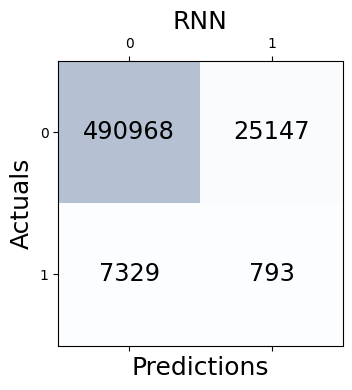

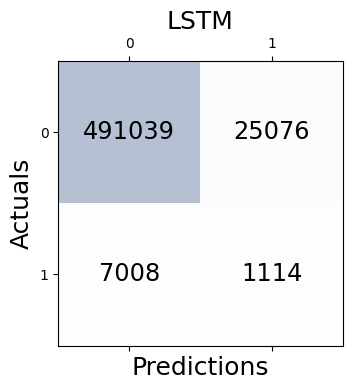

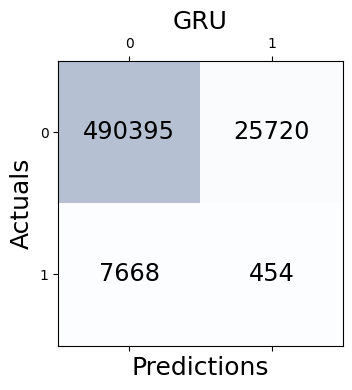

In [15]:
from publications.lacci2024.plotter import Plotter
plotter = Plotter()
for y_true, y_pred, y_pred_score in list_ys_true_pred:
    plotter.plot_matrix(y_true, y_pred,name_cycler, filename=f"confusion_{sequence_length}")


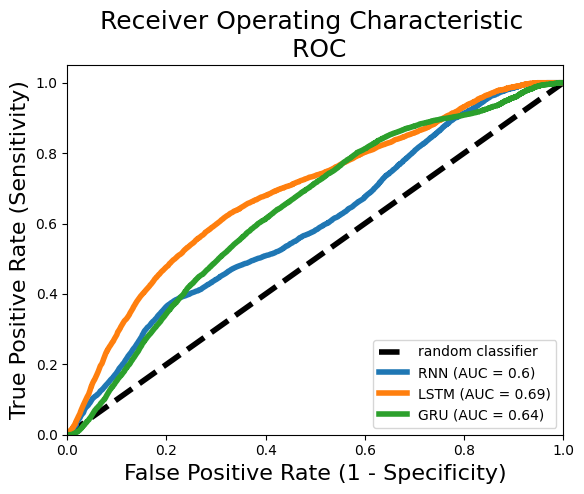

In [16]:
from sklearn import metrics
import cycler
title = "ROC"
fig, ax = plt.subplots()
ax.plot([0,1], [0,1], "k--",linewidth=4, label='random classifier')
for y_true, y_pred, y_pred_score in list_ys_true_pred:
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred_score)
    auc = metrics.auc(fpr, tpr)
    ax.plot(fpr, tpr,  linewidth=4, label=f"{next(name_cycler)} (AUC = {round(auc,2) })")
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel("False Positive Rate (1 - Specificity)", fontsize=16)
ax.set_ylabel("True Positive Rate (Sensitivity)", fontsize=16)
ax.set_title(f"Receiver Operating Characteristic \n {title}", fontsize=18)
ax.legend(loc="lower right")
plt.savefig(f"roc_{sequence_length}.pdf")

plt.show()

In [17]:
def roc(y_true, y_pred_score):
    fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred_score)
    auc = metrics.auc(fpr, tpr)
    return auc

In [18]:
import scipy.stats as st

In [19]:
def roc_samples(y_t, y_s):
    N = len(y_t)
    rocs = []
    for b in range(30):
        choices = np.random.choice(N, size=N)
        ys_t = y_t[choices]
        ys_p = y_s[choices]
        fpr, tpr, thresholds = metrics.roc_curve(ys_t, ys_p)
        auc = metrics.auc(fpr, tpr)
        rocs.append(auc)
    return rocs

cis = []
for y_true, y_pred, y_pred_score in list_ys_true_pred:
    rocs = roc_samples(y_true, y_pred_score)
    roc_mean = np.mean(rocs)
    roc_std = np.std(rocs)
    roc_lb = roc_mean - 1.96 * roc_std
    roc_up = roc_mean + 1.96 * roc_std
    ci = f'{round(roc_mean, 2)} {round(roc_lb, 2), round(roc_up, 2)}'
    cis.append(ci)


In [20]:
cis

['0.6 (0.59, 0.6)', '0.69 (0.68, 0.69)', '0.64 (0.63, 0.65)']

In [25]:
import pandas as pd

In [26]:
df_ci = pd.DataFrame({
        "Model": names,
        "95% Confidence Interval": cis
    })
print(df_ci.to_latex(index=False, escape=True))

\begin{tabular}{ll}
\toprule
Model & 95\% Confidence Interval \\
\midrule
RNN & 0.57 (0.56, 0.58) \\
LSTM & 0.69 (0.68, 0.7) \\
GRU & 0.75 (0.74, 0.76) \\
\bottomrule
\end{tabular}

